# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
with open (output_data_file, 'r') as f:
    csv_reader = csv.reader(f, delimiter=',')


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
weather_df = pd.DataFrame({'City':cities})
weather_df.head()

590


,City
0,los llanos de aridane
1,changqing
2,bintulu
3,matai
4,hobart


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
import requests

# Import API key
from api_keys import api_key

units = "metric"

In [4]:
# Build query URL 

url = "http://api.openweathermap.org/data/2.5/weather?"

for index, row in weather_df.iterrows():
    i_city = row['City']
    query_url = str(url + "appid=" + api_key + "&q=" + i_city + "&units" + units)
    # Get weather data and add values to Dataframe
    weather_response = requests.get(query_url)
    if weather_response.status_code == 200:
        try:
            weather_json = weather_response.json()
            weather_df.loc[index, 'Cloudiness'] = weather_json["clouds"]["all"]
            weather_df.loc[index, 'Country'] = weather_json["sys"]["country"]
            weather_df.loc[index, 'Date'] = weather_json["dt"]
            weather_df.loc[index, 'Humidity'] = weather_json["main"]["humidity"]
            weather_df.loc[index, 'Lat'] = weather_json["coord"]["lat"]
            weather_df.loc[index, 'Lng'] = weather_json["coord"]["lon"]
            weather_df.loc[index, 'Max Temp'] = weather_json["main"]["temp_max"]
            weather_df.loc[index, 'Wind Speed'] = weather_json["wind"]["speed"]

        except (KeyError, IndexError):
            pass
                
weather_df.dropna(inplace=True)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,los llanos de aridane,20.0,ES,1.540015e+09,72.0,28.66,-17.92,292.15,3.60
1,changqing,40.0,CN,1.540012e+09,59.0,31.81,117.24,292.15,4.00
2,bintulu,90.0,MY,1.540015e+09,88.0,3.17,113.03,301.15,3.10
3,matai,75.0,TZ,1.540012e+09,82.0,-8.30,31.52,290.15,1.51
4,hobart,75.0,AU,1.540015e+09,37.0,-42.88,147.33,292.15,4.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [5]:
#Get Max Unix date and convert
weather_date = weather_df["Date"].max()
from datetime import date
weather_date_convert = date.fromtimestamp(weather_date)
weather_date_format = weather_date_convert.strftime("%d/%m/%y")

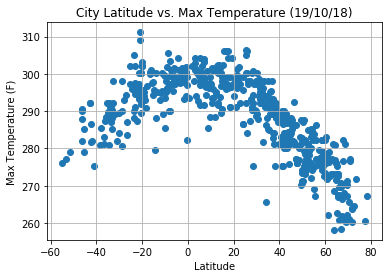

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({weather_date_format})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/Temperature_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

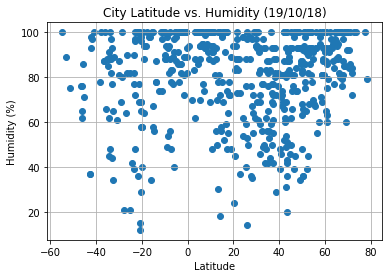

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({weather_date_format})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

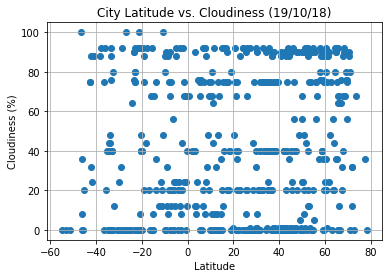

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({weather_date_format})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

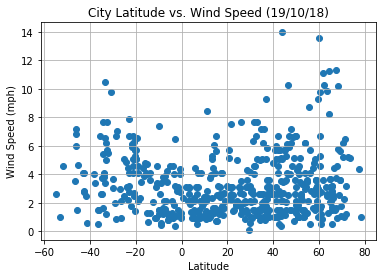

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({weather_date_format})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/WindSpeed_vs_Latitude.png")

# Show plot
plt.show()